Text(0.5, 1.0, 'Kangaroo Jumps Today')

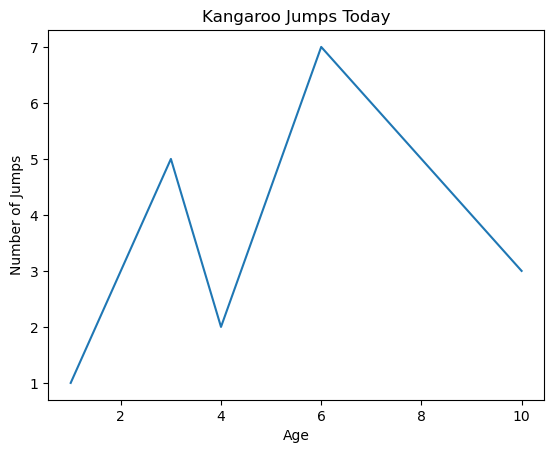

In [2]:
import matplotlib.pyplot as plt

plt.plot([1,3,4,6,10],[1,5,2,7,3])
plt.xlabel('Age')
plt.ylabel('Number of Jumps')
plt.title('Kangaroo Jumps Today')

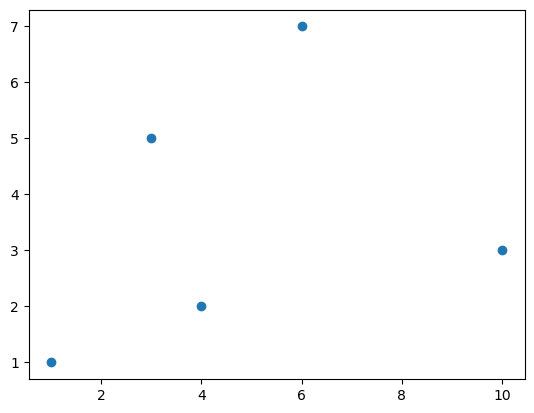

In [3]:
fig, ax = plt.subplots()
ax.scatter([1,3,4,6,10],[1,5,2,7,3])

Text(0.5, 1.0, 'Kangaroo Jumps Today')

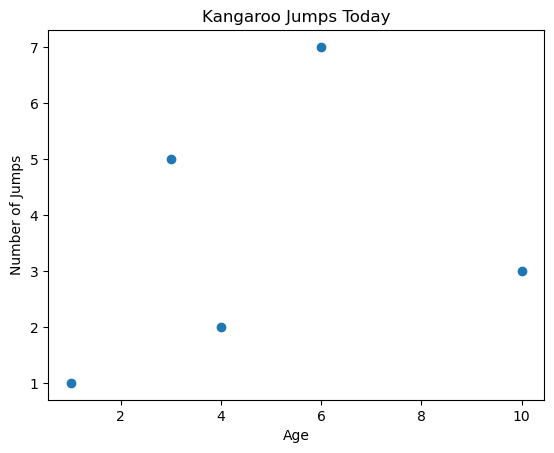

In [4]:
fig, ax = plt.subplots()
ax.scatter([1,3,4,6,10],[1,5,2,7,3])
ax.set_xlabel('Age')
ax.set_ylabel('Number of Jumps')
ax.set_title('Kangaroo Jumps Today')

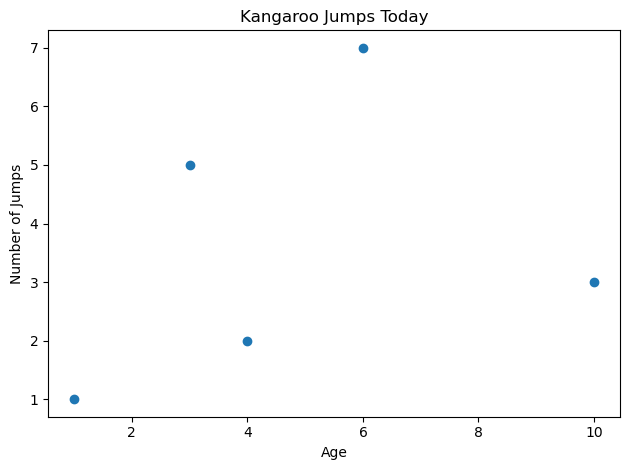

In [5]:
fig, ax = plt.subplots()
ax.scatter([1,3,4,6,10],[1,5,2,7,3])
ax.set_xlabel('Age')
ax.set_ylabel('Number of Jumps')
ax.set_title('Kangaroo Jumps Today')
fig.tight_layout()

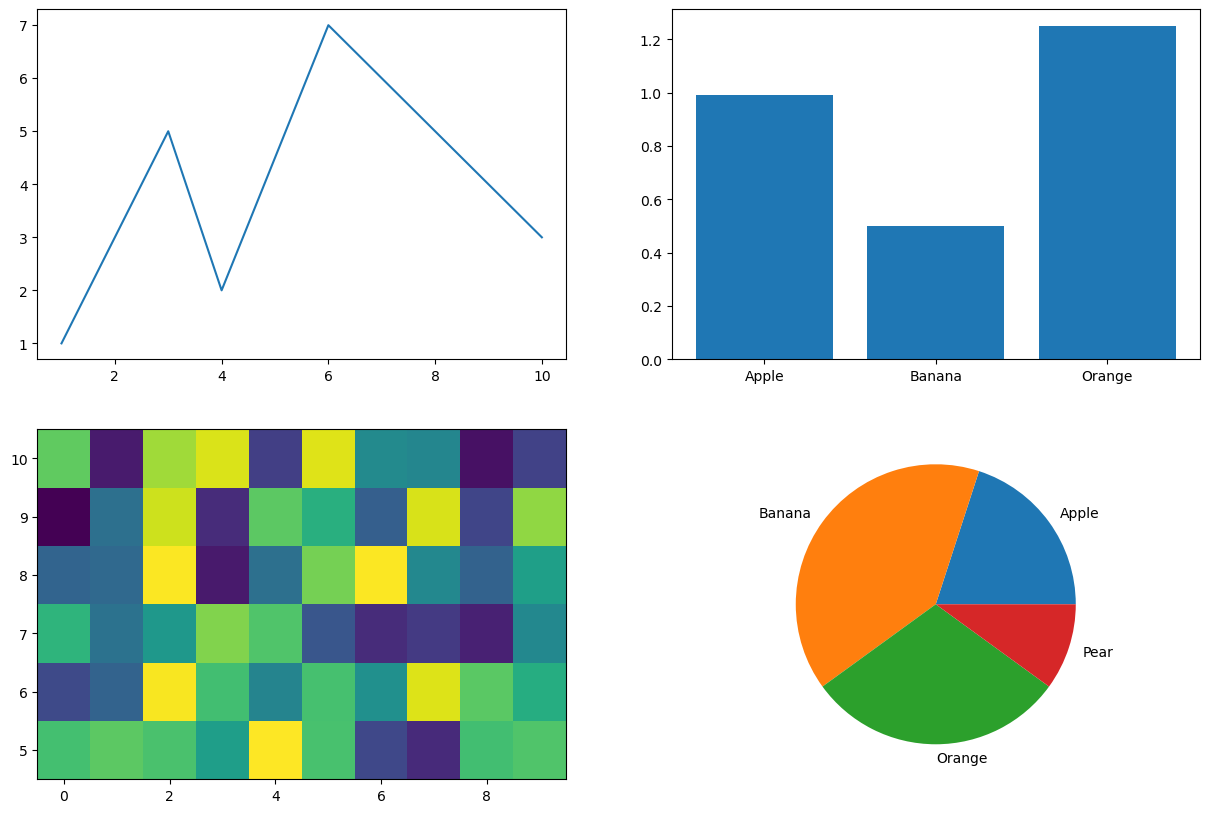

In [8]:
import numpy as np
np.random.seed(19680801)
Z = np.random.rand(6, 10)
x = np.arange(-0.5, 10, 1)  # len = 11
y = np.arange(4.5, 11, 1)  # len = 7

fig, ax = plt.subplots(2,2,figsize=(15,10))
ax[0,0].plot([1,3,4,6,10],[1,5,2,7,3])
# ax[0,0].set_xlabel('Age')
ax[0,1].bar(['Apple','Banana','Orange'],[0.99,0.50,1.25])
ax[1,0].pcolormesh(x, y, Z)
ax[1,1].pie([20,40,30,10], labels=['Apple','Banana','Orange','Pear'])
# plt.xlabel("Age")
fig.savefig('vis.png')

# Plotting with pandas

In [9]:
import pandas as pd
fruit = pd.DataFrame({'name': ['Apple','Banana','Orange','Pear'],
         'count': [20,40,30,10],
         'price': [0.99,0.50,1.25,1.25]})

name  count  price
0   Apple     20   0.99
1  Banana     40   0.50
2  Orange     30   1.25
3    Pear     10   1.25

<Axes: >

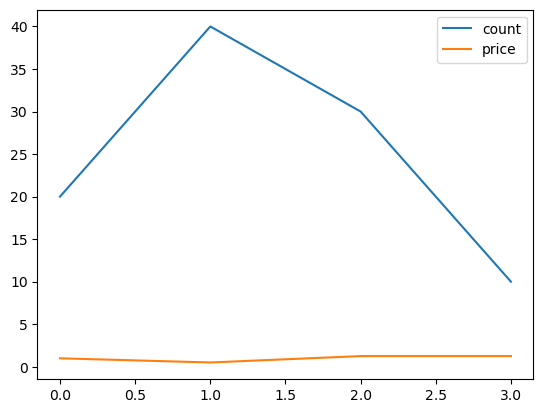

In [10]:
fruit.plot()

<Axes: xlabel='name'>

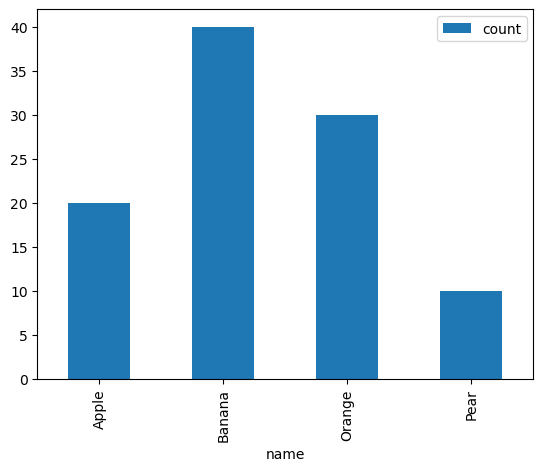

In [17]:
fruit.plot(kind='bar',x='name',y='count')
# plt.title("Fruit Counts")

<BarContainer object of 4 artists>

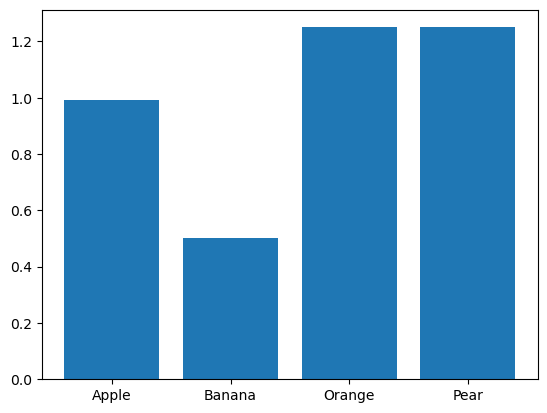

In [18]:
import matplotlib.pyplot as plt

plt.bar(x='name',height='price',data=fruit)
# plt.title("Fruit Counts")

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not array(['Apple', 'Banana', 'Orange', 'Pear'], dtype=object)

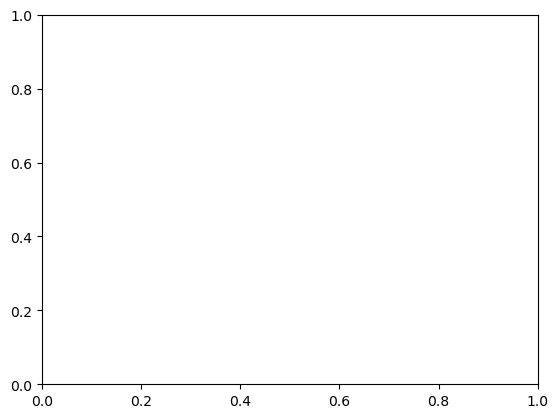

In [20]:
fruit.plot.scatter(x='price',y='count',c='name')

Text(0.5, 1.0, 'Fruit Prices')

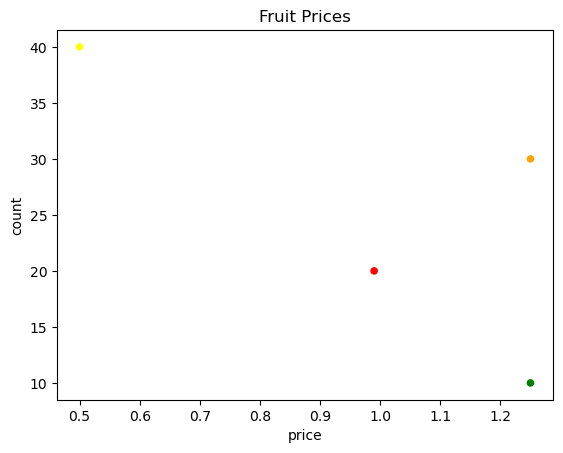

In [27]:
colors = {'Apple': 'red','Orange': 'orange','Banana': 'yellow','Pear': 'green'}
ax = fruit.plot.scatter(x='price',y='count', c=fruit['name'].map(colors))
ax.set_title('Fruit Prices')

<Axes: xlabel='price', ylabel='count'>

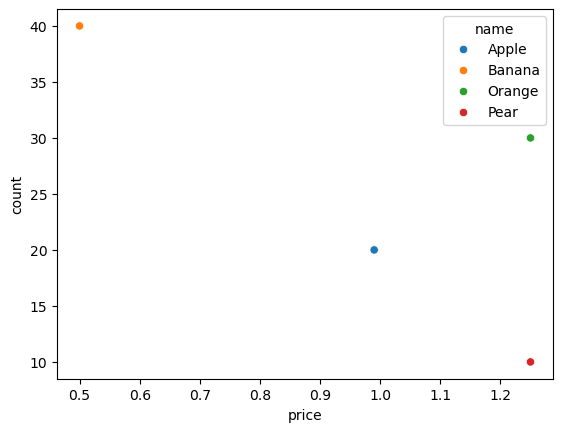

In [28]:
# may need to install seaborn
# %conda install -c conda-forge seaborn

import seaborn as sns
sns.scatterplot(x='price',y='count',hue='name', data=fruit)

# Altair

In [29]:
# may need to install altair
# %conda install -c conda-forge altair

import altair as alt
import pandas as pd

In [30]:
data = pd.DataFrame({
  'x': [1,3,4,6,10],
  'y': [1,5,2,7,3]
})

x  y
0   1  1
1   3  5
2   4  2
3   6  7
4  10  3

In [31]:
alt.Chart(data).mark_line().encode(
    x='x',
    y='y'
)

alt.Chart(...)

### Attribute Types

In [32]:
data = pd.DataFrame({
    'age': [1,3,4,6,10],
    'weight': [20,50,25,55,125],
    'zoo_area': [1,3,3,1,2],
    'num_scoops': [3,2,4,2,3]
})

age  weight  zoo_area  num_scoops
0    1      20         1           3
1    3      50         3           2
2    4      25         3           4
3    6      55         1           2
4   10     125         2           3

In [35]:
alt.Chart(data).mark_point(filled=True, size=100, stroke='black',strokeWidth=1).encode(
    x='age',
    y='weight',
    color='zoo_area' #:Q
)

alt.Chart(...)

In [36]:
alt.Chart(data).mark_point(filled=True, size=100, stroke='black',strokeWidth=1).encode(
    x='age',
    y='weight',
    color='zoo_area:O'
)

alt.Chart(...)

In [37]:
alt.Chart(data).mark_point(filled=True, size=100, stroke='black',strokeWidth=1).encode(
    x='age',
    y='weight',
    color='zoo_area:N'
)

alt.Chart(...)

In [38]:
# Bubble Chart

data = pd.DataFrame({
    'age': [1,3,4,6,10, 11,7,5,9,9],
    'weight': [20,50,25,55,125, 20,50,25,55,125],
    'zoo_area': [1,3,3,1,2, 1,3,3,1,2],
    'num_scoops': [3,2,4,2,3,10,5,7,90,120]
})

alt.Chart(data).mark_point(filled=True, stroke='black',strokeWidth=1).encode(
    x='age',
    y='weight',
    color='zoo_area:N',
    size='num_scoops'
)

alt.Chart(...)

### Concatenation, Layering, and Repetition

In [39]:
c1 = alt.Chart(data).mark_point(filled=True, stroke='black',strokeWidth=1).encode(
    x='age',
    y='weight',
    color='zoo_area:N',
    size='num_scoops'
)

alt.Chart(...)

In [40]:
c2 = alt.Chart(data).mark_bar().encode(
    x='zoo_area:N',
    y='count()'
)

alt.Chart(...)

In [41]:
c1 | c2

alt.HConcatChart(...)

In [42]:
c1 & c2

alt.VConcatChart(...)

In [43]:
data = pd.DataFrame({
  'x': [1,3,4,6,10],
  'y': [1,5,2,7,3]
})

lines = alt.Chart(data).mark_line().encode(
    x='x',
    y='y'
)

dots = alt.Chart(data).mark_point(size=150, shape='triangle', color='red',filled=True).encode(
    x='x',
    y='y'
)

lines

alt.Chart(...)

In [44]:
dots

alt.Chart(...)

In [45]:
lines + dots

alt.LayerChart(...)